In [ ]:
import numpy as np
import graphviz as gv

In [ ]:
class ArrayBinTree:
    def __init__(self, dtype, height , emptydata= -9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height + 1) - 1
        self.array = np.empty(self.array_size, dtype = dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("eror set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = np.floor( (node_idx - 1)/2 )
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current = 0, result = None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        #kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current = left_idx, result = result)

        #kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current = right_idx, result = result)

        if is_starting_node:
            return result

    #inorder: kiri, tengah, kanan
    def get_inorder(self, current = 0, result = None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current = left_idx, result = result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        #kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current = right_idx, result = result)

        if is_starting_node:
            return result

    #postorder: kiri, kanan, tengah

    def get_postorder(self, current = 0, result = None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        #kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result = result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result = result)

        #tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label = str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label = "NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label = "NULL", shape="none")
        return digraph

In [ ]:
arraybintree = ArrayBinTree(int, 2)

In [ ]:
print(arraybintree.array)

[-9999 -9999 -9999 -9999 -9999 -9999 -9999]


In [ ]:
arraybintree.set_root(10)

In [ ]:
print(arraybintree.array)

[   10 -9999 -9999 -9999 -9999 -9999 -9999]


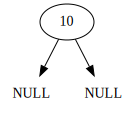

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.set_data(
    arraybintree.get_left_child_idx(0),
    4
)

In [ ]:
print(arraybintree.array)

[   10     4 -9999 -9999 -9999 -9999 -9999]


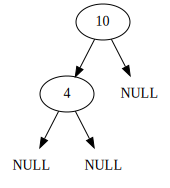

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(0),
    9
)

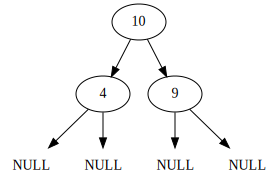

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0)),
    37
)

In [ ]:
print(arraybintree.array)

[   10     4     9 -9999    37 -9999 -9999]


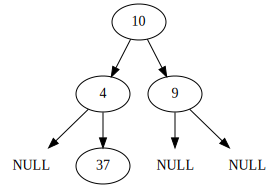

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.array[5] = 89
arraybintree.array[6] = 26

In [ ]:
print(arraybintree.array)

[   10     4     9 -9999    37    89    26]


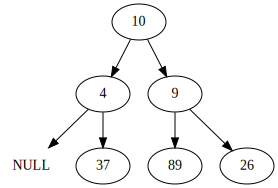

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.array[3] = 90

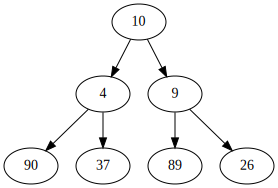

In [ ]:
display(arraybintree.get_digraph_simple())

In [ ]:
arraybintree.get_preorder()

[10, 4, 90, 37, 9, 89, 26]

In [ ]:
arraybintree.get_inorder()

[90, 4, 37, 10, 89, 9, 26]

In [ ]:
arraybintree.get_postorder()

[90, 37, 4, 89, 26, 9, 10]